In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score

In [8]:
# Рисовалка кривых обучения

def draw_curves (history, los, metric):
    
    acc = history.history[metric]
    val_acc = history.history['val_'+metric]
    loss = history.history[los]
    val_loss = history.history['val_'+los]

    epochs = range(1, len(acc)+1)
    plt.plot(epochs, acc, 'bo', label = 'Training '+metric)
    plt.plot(epochs, val_acc, 'b', label = 'Validation '+metric)
    plt.title('Training and Validation '+metric)
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label = 'Training loss')
    plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
    plt.title('Training and Validation loss')
    plt.legend()

    plt.show()

## Нейросеть

In [9]:
X = pd.read_csv('X.csv', index_col = 'Unnamed: 0')
Y = pd.read_csv('Y.csv', index_col = 'Unnamed: 0')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = Y)

In [10]:
sc = StandardScaler()

X_t_train = sc.fit_transform(X_train)
X_t_test = sc.transform(X_test)

In [11]:
#  Структура модели
model = models.Sequential()

model.add(layers.Dense(16, activation="relu", input_shape = (X_t_train.shape[1],)))
#model.add(layers.Dropout(0.05))
model.add(layers.Dense(16, activation="relu"))#, input_shape = (X_t_train.shape[1],)))
#model.add(layers.Dropout(0.05))
model.add(layers.Dense(16, activation="relu")) #input_shape = (X_t_train.shape[1],)))
#model.add(layers.Dropout(0.05))
#model.add(GlobalAveragePooling1D())
model.add(layers.Dense(8, activation="softmax", kernel_regularizer = regularizers.l2(0.001)))#, input_shape = (X_t_train.shape[1],), #kernel_regularizer = regularizers.l1(0.1)
                       ##))

In [12]:
# Компиляция модели
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [13]:
X_t_train.shape, Y_train.shape

((8492, 13), (8492, 1))

In [14]:
# Обучение модели
history = model.fit(X_t_train, Y_train, validation_data = (X_t_test, Y_test), epochs = 130, batch_size = 16) #epochs = 130

Epoch 1/130
531/531 [==============================] - 4s 3ms/step - loss: 1.2647 - accuracy: 0.5612 - val_loss: 0.8921 - val_accuracy: 0.7122
Epoch 2/130
531/531 [==============================] - 1s 2ms/step - loss: 0.7628 - accuracy: 0.7534 - val_loss: 0.6792 - val_accuracy: 0.7767
Epoch 3/130
531/531 [==============================] - 1s 2ms/step - loss: 0.6496 - accuracy: 0.7818 - val_loss: 0.6223 - val_accuracy: 0.7862
Epoch 4/130
531/531 [==============================] - 1s 2ms/step - loss: 0.6104 - accuracy: 0.7958 - val_loss: 0.6014 - val_accuracy: 0.7979
Epoch 5/130
531/531 [==============================] - 1s 2ms/step - loss: 0.5907 - accuracy: 0.7995 - val_loss: 0.5876 - val_accuracy: 0.8022
Epoch 6/130
531/531 [==============================] - 1s 2ms/step - loss: 0.5788 - accuracy: 0.8062 - val_loss: 0.5850 - val_accuracy: 0.8064
Epoch 7/130
531/531 [==============================] - 1s 2ms/step - loss: 0.5740 - accuracy: 0.8075 - val_loss: 0.5694 - val_accuracy: 0.8144

Epoch 58/130
531/531 [==============================] - 1s 2ms/step - loss: 0.4382 - accuracy: 0.8603 - val_loss: 0.4392 - val_accuracy: 0.8610
Epoch 59/130
531/531 [==============================] - 1s 2ms/step - loss: 0.4370 - accuracy: 0.8613 - val_loss: 0.4315 - val_accuracy: 0.8615
Epoch 60/130
531/531 [==============================] - 1s 2ms/step - loss: 0.4334 - accuracy: 0.8619 - val_loss: 0.4368 - val_accuracy: 0.8601
Epoch 61/130
531/531 [==============================] - 1s 2ms/step - loss: 0.4298 - accuracy: 0.8632 - val_loss: 0.4295 - val_accuracy: 0.8662
Epoch 62/130
531/531 [==============================] - 1s 2ms/step - loss: 0.4294 - accuracy: 0.8648 - val_loss: 0.4217 - val_accuracy: 0.8681
Epoch 63/130
531/531 [==============================] - 1s 2ms/step - loss: 0.4264 - accuracy: 0.8674 - val_loss: 0.4229 - val_accuracy: 0.8667
Epoch 64/130
531/531 [==============================] - 1s 2ms/step - loss: 0.4254 - accuracy: 0.8639 - val_loss: 0.4296 - val_accuracy:

Epoch 115/130
531/531 [==============================] - 1s 2ms/step - loss: 0.3812 - accuracy: 0.8795 - val_loss: 0.3862 - val_accuracy: 0.8832
Epoch 116/130
531/531 [==============================] - 1s 2ms/step - loss: 0.3808 - accuracy: 0.8797 - val_loss: 0.3914 - val_accuracy: 0.8813
Epoch 117/130
531/531 [==============================] - 1s 2ms/step - loss: 0.3786 - accuracy: 0.8785 - val_loss: 0.3891 - val_accuracy: 0.8794
Epoch 118/130
531/531 [==============================] - 1s 2ms/step - loss: 0.3807 - accuracy: 0.8791 - val_loss: 0.3860 - val_accuracy: 0.8860
Epoch 119/130
531/531 [==============================] - 1s 2ms/step - loss: 0.3786 - accuracy: 0.8778 - val_loss: 0.3911 - val_accuracy: 0.8837
Epoch 120/130
531/531 [==============================] - 1s 2ms/step - loss: 0.3813 - accuracy: 0.8792 - val_loss: 0.3833 - val_accuracy: 0.8813
Epoch 121/130
531/531 [==============================] - 1s 2ms/step - loss: 0.3768 - accuracy: 0.8798 - val_loss: 0.3918 - val_ac

In [15]:
# Количество параметров моделив каждом слое
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
Total params: 904
Trainable params: 904
Non-trainable params: 0
_________________________________________________________________


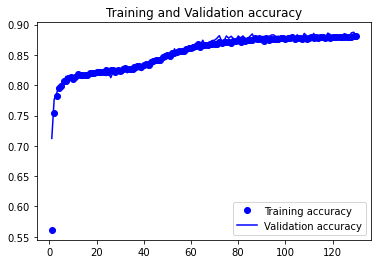

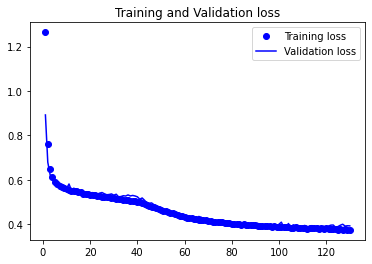

In [16]:
draw_curves(history, 'loss', 'accuracy')

In [17]:
# Прогнозы модели
predict = np.argmax(model.predict(X_t_test), axis=-1)

67/67 [==============================] - 0s 1ms/step


In [18]:
confusion_matrix(Y_test, predict)

array([[771,   1,   6,   0,   0,   0,   0,   0],
       [  6, 338,   4,   5,   0,   0,  12,   0],
       [  1,  16, 315,   5,  14,   5,   0,   0],
       [  0,   1,  11, 294,   2,   6,   0,   0],
       [  0,   0,   8,   3, 104,   2,   0,   0],
       [  2,   8,  40,  11,  15,  12,   1,   0],
       [  0,  39,   2,   2,   0,   0,  37,   0],
       [  0,   7,   7,   6,   2,   1,   1,   0]], dtype=int64)

In [21]:
f1_score(Y_test, predict, average = 'micro')

0.881300047103156

In [22]:
# Сохранение модели
model.save('neuron_net_clf.h5')